In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
train = pd.read_csv("data/digit-recognizer/train.csv")
test = pd.read_csv("data/digit-recognizer/test.csv")

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
X_train = np.round(X_train/255)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

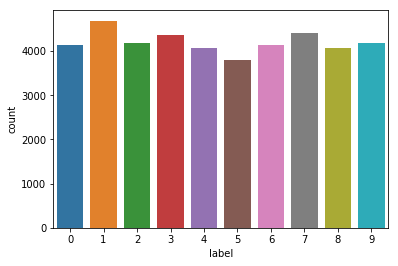

In [4]:
# free some space
# del train 

# Plot label count
g = sns.countplot(Y_train)
# Print Label Count
Y_train.value_counts()

In [5]:
ycount = np.zeros(shape = (10))
xcount = np.zeros(shape = (784,10))

In [6]:
# Count frequency of pixel is zero and one, for each label
for i in range(10):
    # select all rows with label i
    i_label = train[train['label'] == i]
    i_label = i_label.drop(labels = ["label"],axis = 1)
    
    # Threshold training dataset
    i_label = np.round(i_label/255)
    
    
    # Count frequency
    ycount[i] = ycount[i] + i_label.shape[0]
    xcount[:,i] = xcount[:,i] + np.sum(i_label, axis=0)
    
    # Normalize the probabilities p(x_i/y)
    xcount[:,i] = xcount[:,i]/ycount[i]
    ycount = ycount/np.sum(ycount)

In [7]:
# threshold test data set
test = np.round(test/255)

Infered number: 0


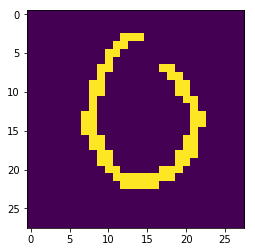

In [8]:
# Select image from test data set
id = 110

# Plot image for visual validation
g = plt.imshow(test.iloc[[id]].values.reshape(28,28))

px = ycount
x = test.iloc[[id]].values.reshape(784,1)

for i in range(10):
    px[i] = np.prod(np.dot(xcount[:,i],x))
    
print("Infered number: {}".format(np.argmax(px)))

In [44]:
# Test accuracy on train data set
correct = 0
count = 0

for i in range(train.shape[0]):
    px = ycount
    x = X_train.iloc[[i]].values.reshape(784,1)

    for j in range(10):
        px[j] = np.prod(np.dot(xcount[:,j],x))
#         px[j] = np.prod(np.dot(xcount[:,j],x) + np.dot(1-xcount[:,j],1-x))
        
#     px = px*ycount
#     px = px/np.prod(np.dot(np.sum(xcount, axis=1).reshape(784),x) + np.dot(np.sum(xcount, axis=1).reshape(784),1-x))
#     px = px/np.prod(np.dot(np.sum(xcount, axis=1).reshape(784),x))
          
    if np.argmax(px) == Y_train[i]:
        correct += 1
        
    count += 1
    
print("Accuracy is {}%".format(100*correct/count))

Accuracy is 62.68809523809524%
